### ClusificationTestMicrobiomics

In [1]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import itertools
import pandas as pd 
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from itertools import product
import random
from six.moves import cPickle as pickle
import gc


# data_root = "C:\\Users\\Tigran PC\\Desktop\\MicrobiomicsData\\data\\" # notebook
# data_root = "/Users/tigran/Desktop/sbv/data/" # imac
data_root = "C:\\Users\\Administrator\\Repos\\Microbiomics\\data\\" # server

sub_data_root = data_root + "sample\\"

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
df_train_list = []
for i in range(1, 2):
    print("Parsing - ", i)
    df_train_list.append(pd.read_pickle(data_root + "F_Bank_{0}.pickle".format(i)))  

df_train = pd.concat(df_train_list)
del df_train_list
gc.collect()

Parsing -  1


0

In [4]:
col_names = ["F{0}".format(i) for i in range(1, 257)]
col_names.append("lable")    
df_train.columns = col_names
print(df_train.shape)
df_train.head()

(9999904, 257)


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F248,F249,F250,F251,F252,F253,F254,F255,F256,lable
0,1,0,0,0,1,0,1,0,1,1,...,3,0,2,0,0,0,0,0,0,1716143
1,2,0,1,2,0,0,0,0,0,0,...,1,1,1,0,0,0,2,0,0,1398
2,1,1,0,0,1,0,1,0,1,0,...,0,0,0,0,1,1,1,0,0,216142
3,0,2,1,0,0,0,0,0,2,0,...,0,0,0,0,3,0,0,0,0,864051
4,0,0,0,0,2,0,0,0,0,1,...,0,0,1,0,2,0,0,0,0,1218177


In [85]:
with open(data_root + 'taxid.txt') as f:
    keys = f.readlines()
keys = [x.strip() for x in keys] 

some_values = keys[:100]

df1 = df_train.loc[df_train['lable'].isin(some_values)]

In [86]:
df1.shape

(385290, 257)

In [87]:
# df1 = df1.sample(frac=1).reset_index(drop=True)
X = df1.values[:, :-1]
y = df1.values[:, -1]

In [88]:
# del df1
gc.collect()

13956

In [89]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [90]:
del X, y
gc.collect()

0

### Random Forest

In [91]:
clf = RandomForestClassifier(n_estimators=15, min_samples_leaf=2, n_jobs = -1)

In [92]:
%time clf.fit(x_train, y_train)

Wall time: 11 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [93]:
%time y_pred = clf.predict(x_test)

Wall time: 2.31 s


In [94]:
accuracy_score(y_test, y_pred)

0.13293882530042306

In [95]:
confusion_matrix(y_test, y_pred)

array([[ 7,  0,  7, ...,  0,  0,  0],
       [ 0, 29,  0, ...,  0,  0,  0],
       [ 5,  0, 27, ...,  1,  0,  2],
       ...,
       [ 0,  4,  0, ..., 27,  0,  0],
       [ 1,  0,  0, ...,  2, 18,  6],
       [ 0,  0,  1, ...,  0,  7,  9]], dtype=int64)

Normalized confusion matrix
[[0.03196347 0.         0.03196347 ... 0.         0.         0.        ]
 [0.         0.04258443 0.         ... 0.         0.         0.        ]
 [0.0148368  0.         0.08011869 ... 0.00296736 0.         0.00593472]
 ...
 [0.         0.0064     0.         ... 0.0432     0.         0.        ]
 [0.00299401 0.         0.         ... 0.00598802 0.05389222 0.01796407]
 [0.         0.         0.00293255 ... 0.         0.02052786 0.02639296]]


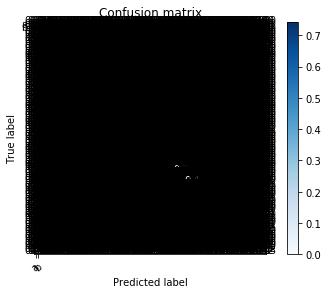

In [96]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['a','b'], normalize=True)

In [ ]:
import xgboost as xgb
%time gbm = xgb.XGBClassifier(max_depth=4, n_estimators=100, learning_rate=0.5, n_jobs=-1).fit(x_train, y_train)
print("done")

In [82]:
%time y_pred = gbm.predict(x_test)
print("done")

Wall time: 200 ms
done


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [83]:
accuracy_score(y_test, y_pred)

0.7022635998539613

Normalized confusion matrix
[[0.30612245 0.         0.15306122 0.00510204 0.10204082 0.04591837
  0.2244898  0.         0.04591837 0.11734694]
 [0.         0.90161527 0.         0.03671072 0.         0.
  0.         0.06020558 0.00146843 0.        ]
 [0.09597523 0.         0.42105263 0.00309598 0.05263158 0.04334365
  0.17027864 0.         0.0495356  0.16408669]
 [0.0014881  0.02083333 0.0014881  0.84077381 0.01041667 0.00446429
  0.03571429 0.06845238 0.00744048 0.00892857]
 [0.0376569  0.00209205 0.05648536 0.01464435 0.5334728  0.0125523
  0.25941423 0.00209205 0.01464435 0.06694561]
 [0.05882353 0.         0.23529412 0.0130719  0.11111111 0.24183007
  0.09150327 0.         0.09803922 0.1503268 ]
 [0.03262233 0.00125471 0.05144291 0.02760351 0.07904642 0.01003764
  0.66624843 0.00250941 0.04015056 0.08908407]
 [0.         0.07496252 0.         0.08095952 0.00149925 0.
  0.01349325 0.82008996 0.00149925 0.00749625]
 [0.0164271  0.         0.03285421 0.01437372 0.00616016 0.01232033
 

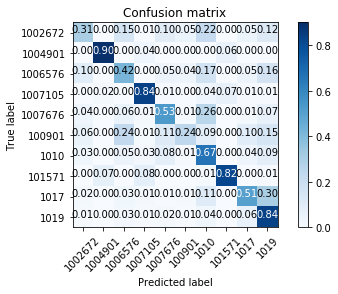

In [84]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), some_values, normalize=True)

### Random Forest